In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from sklearn.datasets import make_blobs

In [25]:
X,y = make_blobs(n_samples=1000, n_features=4, centers=3)

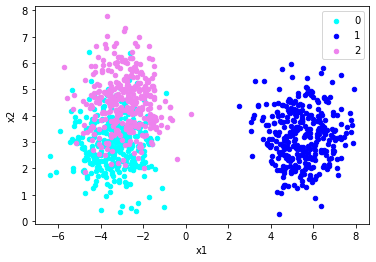

In [26]:
df = DataFrame(dict(x1=X[:,0], x2=X[:,1], x3=X[:,2], x4=X[:,3] ,label=y))
colors = {0:'aqua', 1:'blue', 2:'violet'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
pyplot.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X= df.drop(['label'] , axis='columns')
y = df.label

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

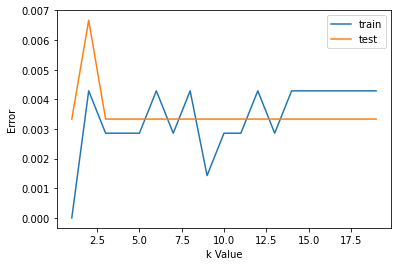

In [30]:
from sklearn.neighbors import KNeighborsClassifier
error1= []
error2=[]
for k in range(1,20):
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred1= knn.predict(X_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2= knn.predict(X_test)
  error2.append(np.mean(y_test!=y_pred2))

plt.plot(range(1,20),error1,label="train")
plt.plot(range(1,20),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()


In [31]:
knn= KNeighborsClassifier(n_neighbors=9)

In [33]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9966666666666667

Text(42.0, 0.5, 'Truth')

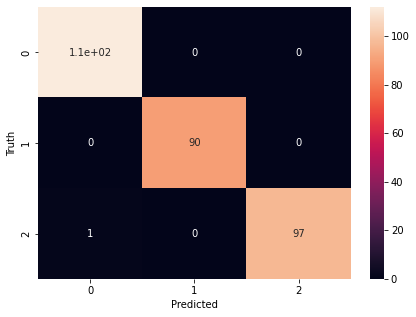

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       112
           1       1.00      1.00      1.00        90
           2       1.00      0.99      0.99        98

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

